# Workbook : Inference

We've spent a lot of time in section getting comfortable with working with data in Python. We've wrangled, explored, and visualized. We've answered questions...but haven't done so in a statistically rigorous way. That stops now. In this workbook, we'll work through distributions and regression. Then, next week, you'll have the opportunity to carry out the analysis discussed during our in-class case study discussion.

To get started **run the cell below to import the packages we'll use in this notebook.**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

# Part I : Distributions

Note: This section includes content from a [section workbook](https://github.com/robloughnan/cogs108_w19-section/blob/master/Week_7/Distributions_and_Ordinary_Least_Squares.ipynb) developed and authored by **Rob Laughnan**, a current COGS PhD stduent.   

In this section we will look at different distributions and plot them out. Additionally, we will consider what types of processes might have generated each of these distributions.

The module stats in scipy has many useful distributions, below import from this module each of the following distributions:

- uniform
- norm
- bernoulli
- poisson

**Import these modules from stats in scipy**

In [2]:
## YOUR CODE HERE
from scipy.stats import uniform, norm, bernoulli, poisson

In [3]:
assert(uniform)

Each of these distributions are represented as classes by `scipy`. In order to generate a random sample from each of these distributions, we'll use the method `rvs`. We will generate 1000 samples for each distribution and plot them out using a histogram. The argument you'll define specifies the number of samples (the argument in the rvs method is `size`). 

A reminder that you can alwas look at the documentation when using something new or unfamiliar. In order to do this use `?` (e.g. `uniform?`) and look at the methods section of the documentation to see what arguments `rvs` takes.

### Uniform Distribution

**Use `uniform.rvs` and assign its output to the variable `samples`. In this function, specify the location parameter to be 100, set the scale to be 20, and the sample size to be 1000.**

In [4]:
## YOUR CODE HERE
samples = uniform.rvs(loc=100, scale=20, size=1000)

In [5]:
assert len(samples)==1000
assert isinstance(samples, np.ndarray)

**Now, generate a histogram of this distribution**

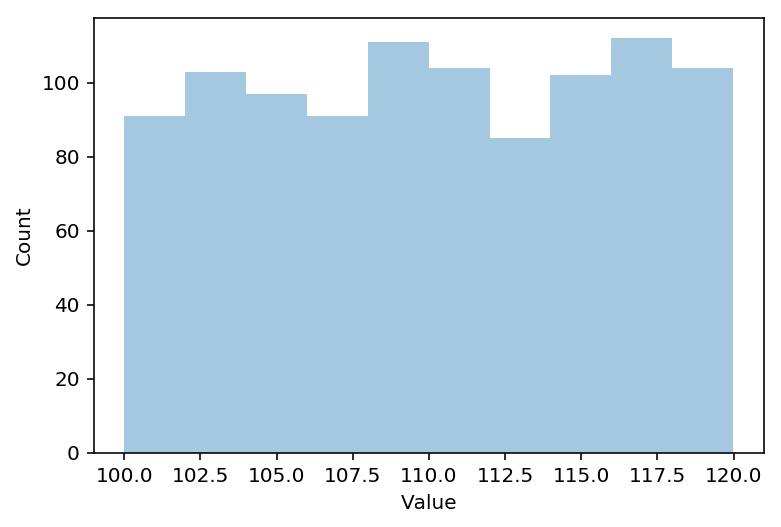

In [6]:
## YOUR CODE HERE
sns.distplot(samples, kde=False)
plt.ylabel('Count')
plt.xlabel('Value');

### Normal Distribution

**Now, step through the same process to generate a histogram, but this time for a Normal distribution of the same sample size with a mean of 100 and standard deviation of 15.**

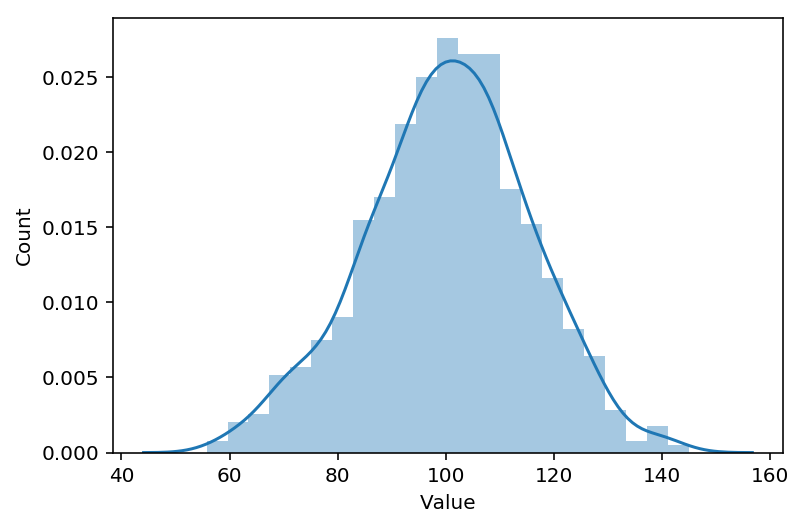

In [7]:
## YOUR CODE HERE
samples = (norm.rvs(size=1000)*15) + 100
sns.distplot(samples)
plt.ylabel('Count')
plt.xlabel('Value');

### Bernoulli Distribution

**Do the same but for a Bernoulli distribution with a probabiliy of 0.5.**

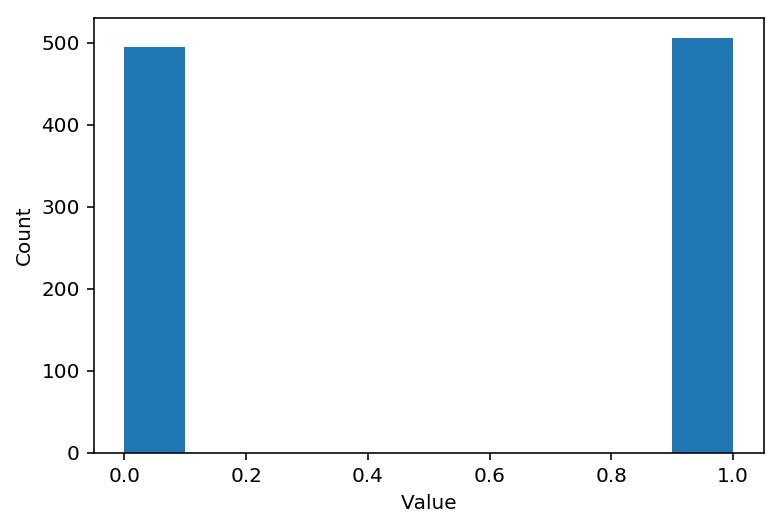

In [8]:
## YOUR CODE HERE
plt.hist(bernoulli.rvs(p=0.5, size=1000)),
plt.ylabel('Count')
plt.xlabel('Value');

### Poisson Distribution

**Finally, create a histogram of a Poisson distribution with mean 4.**

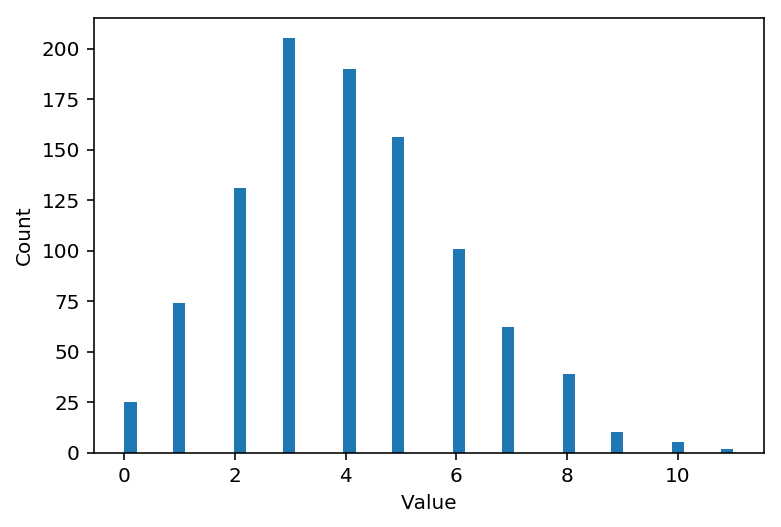

In [9]:
## YOUR CODE HERE
samples = poisson.rvs(mu=4, size=1000)
plt.hist(samples, bins=50),
plt.ylabel('Count')
plt.xlabel('Value');


Discuss with your classmates which distribution matches each of the data generation processes you just generated?

- Toss of a coin 
- The serial number of any dollar bill chosen at random
- The number of hurricanes in a given year
- IQ scores in the general population


**Answers:**
- Toss of a coin (**Bernoulli**)
- The serial number of any dollar bill chosen at random (**Uniform**)
- The number of hurricanes in a given year (**Poisson**)
- IQ scores in the general population (**Normal**)

# Part II : Data Simulation & Correlation

This week, we're just trying to understand the principles behind inference, so we're going to simulate data. However, next week, you'll work with a real dataset to answer a question using inference.

We are going to simulate idealized age and income data using these distributions. First **create an array `age` that has 1000 random samples of a uniform distribution from 0 to 80 (Hint: you can use multiplication to scale the interval you desire). Additionally, create another array, `income`, with 1000 samples from a normal distribution that has a mean of 30 and a standard-deviation of 10 (working in units of 1000s of dollars).**

In [10]:
## YOUR CODE HERE
age = uniform.rvs(size=1000)*80
income = norm.rvs(30, 10, size=1000)

In [11]:
assert len(age) == 1000
assert round(np.mean(income)) == 30

**Make a scatter plot of these two arrays and calculate thier Pearson correlation coefficient and associated p-value - you will need to import `pearsonr` from scipy.stats to do this.**

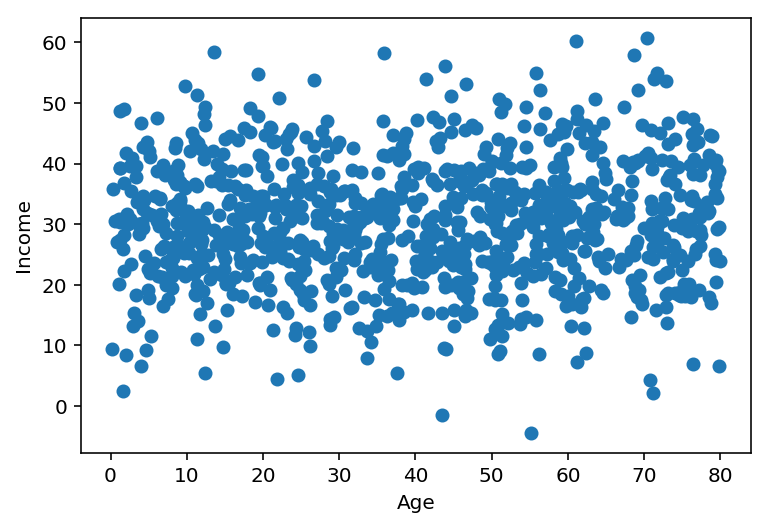

Pearsons correlation coefficient = 0.040 (p=0.211)


In [12]:
## YOUR CODE HERE
from scipy.stats import pearsonr
plt.scatter(age, income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(age, income)[0], pearsonr(age, income)[1]))

In [13]:
assert pearsonr(age, income)[0] < 0.1
assert pearsonr(age, income)[1] > 0.1

Hopefully you have found that these two arrays are weakly and non-significantly (p>0.05) correlated, this is because the two arrays were created independantly. Next, we are going to look at simulating data in which income is related to age. In order to do this, **set up income so that its mean is no longer a single value but instead is a function of age, specifically it is is 0.2*age. Create the same plot and calcualte the pearson correlation as above with income defined in this new way.**

Note that `np.clip` will be useful to ensure that you do not get anyone with negative income.




Pearsons correlation coefficient = 0.453 (p=0.000)


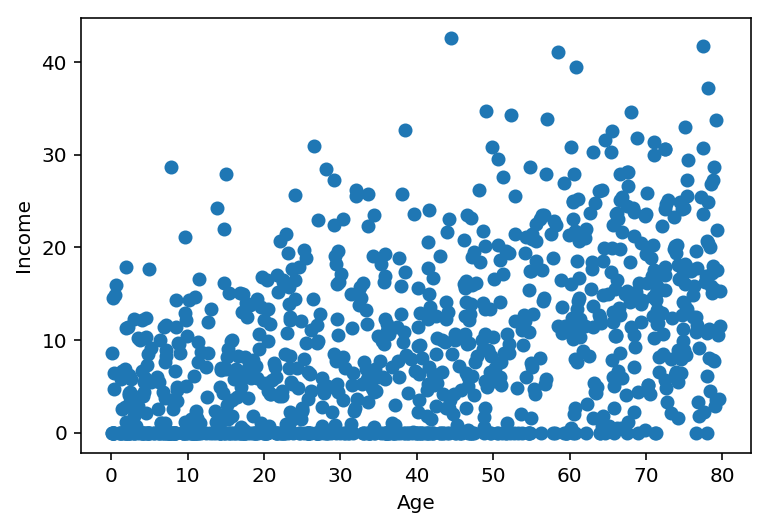

In [14]:
## YOUR CODE HERE
age = uniform.rvs(size=1000)*80
income = np.clip(norm.rvs(age*0.2, 10, size=1000), 0, np.inf)
plt.scatter(age, income)
plt.xlabel('Age')
plt.ylabel('Income');

print('Pearsons correlation coefficient = %.3f (p=%.3f)' % (pearsonr(age, income)[0], pearsonr(age, income)[1]))

In [15]:
assert pearsonr(age, income)[0] > 0.1
assert pearsonr(age, income)[1] < 0.05

# Part III : OLS

We will now perform ordinary least squares (OLS) to see if we can recover the coefficient we used to simulate the data. For this we will use the library `statsmodels` (imported below for you). **Look at the method OLS and by using the example in its documenation or the see if you can fit a linear model between the arrays age and income to see if you can recover the coefficient we used to generate the data. Call the model you fit `results`.** 

In [16]:
import statsmodels.api as sm

## YOUR CODE HERE
model = sm.OLS(income, age)
results = model.fit()

Once you've fit your model, you should be able to **use the method `summary` on your `results` variable to see if you've recovered the coefficient we previously specified during model generation.**

In [17]:
## YOUR CODE HERE
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1490.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):          3.04e-200
Time:                        14:37:08   Log-Likelihood:                -3501.1
No. Observations:                1000   AIC:                             7004.
Df Residuals:                     999   BIC:                             7009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2145      0.006     38.600      0.000       0.204       0.225
==============================================================================
Omnibus:                       52.324   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.256
Skew:                           0.578   Prob(JB):                     1.36e-13
Kurtosis:                       3.292   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""